# Laboratory Session 3

February 8, 2019

## Class Summary

The following notes summarize the material covered in Thurday's (2/7/2019) lecture. This is a fully commented version of the code developed in class demonstrating a proportional feedback controller.  The setup command has been commented out, so this requires the Arduino hardware to be connected to your laptop.

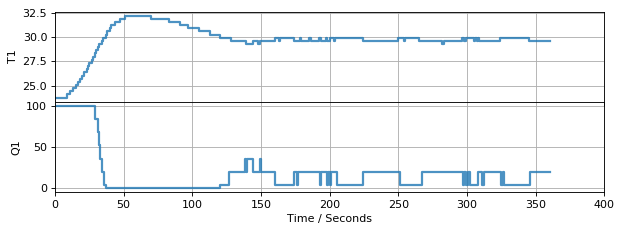

TCLab disconnected successfully.


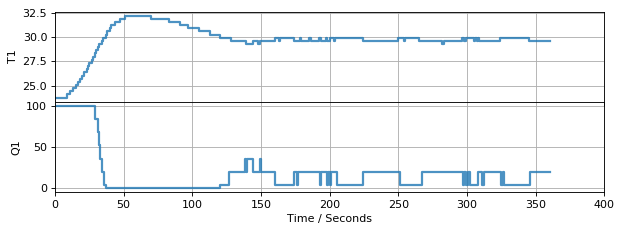

In [10]:
%matplotlib inline

from tclab import clock, Historian, Plotter, setup, TCLab
#TCLab = setup(connected=False, speedup=10)

T_setpoint = 30       # temperature setpoint
MV_feedforward = 0    # estimated power level need to maintain
                      # the heater at the setpoint
Kp = 50               # proportional control constant

with TCLab() as lab:                                           # open a connection to the Arduino
    h = Historian(lab.sources)                                 # setup historian
    p = Plotter(h, twindow=350)                                # setup plotter
    for t in clock(300):                                       # perform experiment for 300 seconds (5 min)
        MV = MV_feedforward - Kp*(lab.T1 - T_setpoint)         # control rule
        MV = max(0, min(100, MV))                              # limit value to between 0 and 100
        lab.Q1(MV)                                             # send command to Arduino
        p.update(t)                                            # update the plotting window
        
h.to_csv('expt_1.csv')                                         # save data to a file

## Lab Exercise 1: Effect of Setpoint Changes

Cut and past the model code into the cell below. Modify the code to adjust the setpoint to 50 deg C and set the proportional control constant to 40. How is the response change?

### Your comments:

Write a summary of your observations in the following text cell. How well did the controller perform?  In particular, how 'fast' was the controlled response? Did the temperature actually get to 50 deg C? If not, how much offset did you observe?

## Lab Exercise 2: Effect of Feedforward Control

Feedforward control augments the control by trying to predict the control action needed to acheive a particular setpoint response. 

Cut and paste your code from Exercise 1 into the cell below. Modify the code to provide a feedforward control MV_feedforward equal to $\frac{P_1}{U_a}(T_{setpoint} - T_{ambient})$ where the value \frac{P_1}{U_a}$ = 1.6. (IF you have values you determined from last week's lab, feel free to use those.)

### Your comments:

Write a summary of your observations in the following text cell. How well did the controller perform?  In particular, how 'fast' was the controlled response? Did the temperature actually get to 50 deg C? If not, how much offset did you observe?

## Lab Exercise 3: Thermostat Control

Cut and paste your code from Exercise 1 into the cell below. Modify the code to provide thermostat control rather than proportational feedback.  How well does it perform? If you don't have enough time to finish in lab, use the simulation mode to complete this exercise.

### Your comments: